# Week 11 Exercises

_McKinney 7.2, 11.1_

The general activity that we are doing in this week's exercise is to explore and try to understand a particular data set.  In this case, it is 

1. Read in the data file and filter down to only looking at MO hospitals
2. Aggregate by Hospital: sum the Denominator, use min Start Date, use max End Date  (watch for rows with no Denominator value!)
3. Calculate the average per day across that entire span
4. Histogram
5. Rank and find the hospital with the most

## STEP 1 - Read and Filter

<img src="images/step1.png" alt="Read and Filter Output" style="width: 500px; float: right; margin-left: 20px; border: 1px solid">

In the first step, read in the data file from the data directory `/data/complications_all.csv`.  It is a CSV file and Pandas should read it in just fine.  Explore the file so that you understand the columns and values.  At the end of this step, create a variable called `mo_hospitals` that contains a data frame from the `complications_all.csv` file, filtered down to only contain those hospitals from the state of Missouri (MO).

A screenshot is included for reference.



In [1]:
import pandas as pd

# This is just to show you the name to use for the variable you need to create for this step to pass.
mo_hospitals = pd.DataFrame()

# Put your code below and make sure that you reassign `mo_hospitals` 
# to have the contents described in the instructions.



In [2]:
mo_hospitals.head()

""


In [5]:
# These assertions will help make sure that you're on the right track.
assert(mo_hospitals['State'].unique() == ['MO'])
assert(mo_hospitals.shape == (2133,18))

## STEP 2 - Transform and Aggregate

<img src="images/step2.png" alt="Transforma and Aggregate Output" style="width: 500px; float: right; margin-left: 20px; border: 1px solid">

In the next step, we need to aggregate the results by hospital.  There are some key fields that we want to summarize, though:
* We want to know the earliest date that each hospital was participating in any program
* We want to know the latest date that each hospital stopped participating in any program
* We want to know the total number of patients in the denominators of these programs

Some things to note:
* You will need to convert the `Start Date` and `End Date` to actual datetime fields
* You will need to clean up and convert the `Denominator` field to just be numeric - the rule that you should use it to simply remove any records where the `Denominator` is `'Not Available'`

The final result of this step should be a new data frame called `mo_summary` that contains one row for each hospital and contains the min start date, max end date, and total denominator.  Use the names `start_date`, `end_date`, and `number` for those columns in `mo_summary`.

A screenshot is included for reference.

In [10]:
# This is just to show you the name to use for the variable you need to create for this step to pass.
mo_summary = pd.DataFrame()

# Put your code below and make sure that you reassign `mo_summary` 
# to have the contents described in the instructions.



In [18]:
assert(mo_summary['number'].sum() == 1766908)
assert(mo_summary['start_date'].min() == pd.Timestamp(2015,4,1))
assert(mo_summary['end_date'].max() == pd.Timestamp(2018,6,30))
assert(mo_summary.shape == (108,3))
assert(mo_summary.loc['BARNES JEWISH HOSPITAL'].number == 131313)
assert(mo_summary.loc['BOONE HOSPITAL CENTER'].number == 63099)

## STEP 3: Average Per Day

<img src="images/step3.png" alt="Average per Day" style="width: 500px; margin-left: 20px; float: right; border: 1px solid">


The next step, now that we have a start date, end date, and total patients for each day is to calculate how many patients on average per day this represents.  You will need to calculate the number of days between the start date and end date, and then the average as total patients divided by number of days.

Your final output should still be the variable `mo_summary`, and it will need to have two additional columns: `days` and `per_day`.

A screenshot is included for reference.


In [19]:
# Put your code below and make sure that you add new columns to `mo_summary` 
# to have the contents described in the instructions.





In [25]:
assert(mo_summary['days'].sum() == 123718)
assert(mo_summary['per_day'].mean() == 13.841279932122697)
assert(mo_summary['per_day'].min() == 0.023744292237442923)
assert(mo_summary['days'].min() == 729)
assert(mo_summary['days'].max() == 1186)

## STEP 4: Histogram

<img src="images/step4.png" alt="Histogram" style="width: 300px; float: right; margin-left: 20px; border: 1px solid">

For this step, I want you to plot a histogram to give yourself a better understanding of this new metric we've calculated: how many patients per day have a potential complication.  Looking at the shape and distribution of the data might give us some indication of the hospital volume and quality.  (Don't take this too seriously, though.  We're cutting some important corners.)

A screenshot is included for reference.

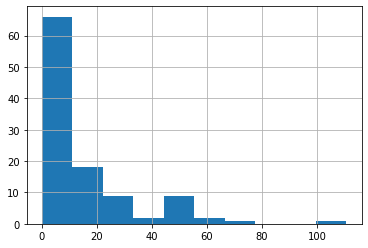

In [26]:
%matplotlib inline
# Use the built-in Pandas histogram plotting capability to plot a histogram of the `per_day` values.




## STEP 5: Rank Order

Now that we see what the distribution looks like, you can tell that most of the `per_day` values are below 20.  There are, however, some outliers up around 100!  Who are those?  Let's rank the data set by the `per_day` value in descending order, examine them, and produce a list of the "top 3" based on this criteria.  That is, who are the top three hospitals based on having the highest `per_day` values.

At the end of this step, put those hospital names in a list called `top_hospitals` and that will be used for testing.  They should be in the order they appear `[#1, #2, #3]`.  That is, if the top hospitals were Mercy (99.3), BJC (97.2), and MoBap (90.1), then you would have `top_hospitals = ['Mercy','BJC','MoBap']`

In [27]:
# Put your code below and make sure that your final result ends up in the variable `top_hospitals`
# as described in the instructions above.

top_hospitals = []




In [28]:
assert(type(top_hospitals) == list)
### BEGIN HIDDEN TESTS
assert(top_hospitals == ['BARNES JEWISH HOSPITAL', 'MERCY HOSPITAL SPRINGFIELD', 'COX MEDICAL CENTERS'])
### END HIDDEN TESTS